# **PRÁCTICA 4 - NEURAL NETWORKS**
1 . PROGRAMACIÓN DE UN PERCEPTRÓN
1. a. Evaluación de la función **AND**
Un perceptrón es la red neuronal más simple en el que no hay capas de neuronas ocultas, tal y como se muestra en el diagrama de la Figura 1.

 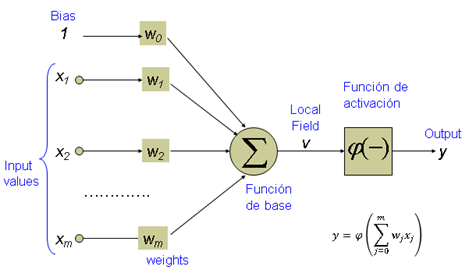

 
Figura 1. Esquema de un perceptrón

En la presente sección de la práctica vamos a programar y evaluar una red neuronal capaz de memorizar funciones lógicas lineales. En concreto vamos a programar un perceptrón capaz de similar una puerta lógica AND. Es decir, este perceptrón tendrá 2 entradas que podrán valer 0 o 1 y una única salida:

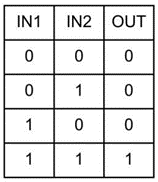

Para la programación de esta red neuronal necesitarás implementar las siguientes funciones:

* initialize_perceptron(n_inputs)

* train_perceptron(myperceptron,LR,input,output)

* useperceptron(myperceptron,input)

También debéis implementar una función principal que incluirá las funciones previas y se encargará de llamar a dichas instrucciones para crear el perceptrón, entrenarlo y evaluar su funcionamiento.
**myperceptron_AND_DNI()**

Esta función debe incluir un entorno gráfico mostrando los resultados como la figura ejemplo que se muestra a continuación:

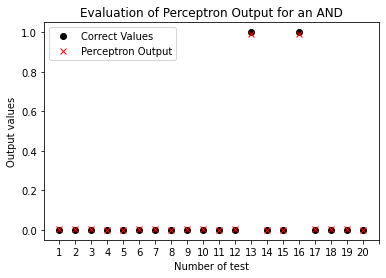

Dicha instrucción principal servirá para crear, entrenar y comprobar el correcto funcionamiento de la red neuronal. En concreto deberás utilizar un banco de 10000 muestras para entrenamiento de la red y un banco de 20 muestras para la evaluación del resultado de la red ya entrenada.

En este ejemplo deberás programar el perceptrón utilizando como función de transferencia la función sigmoidal con un parámetro a igual a 1:

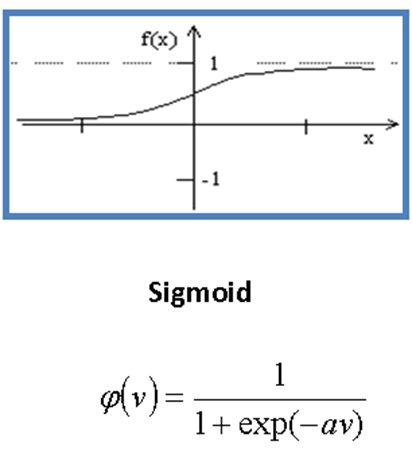

Los valores iniciales de los pesos deberán ser aleatorios y el mecanismo de aprendizaje será el delta rule utilizando un parámetro de aprendizaje η igual a 0.7.

Para implementar el perceptrón seguramente necesitarás estas librerias:

* numpy
* math
* matplotlib.pyplot
 


In [1]:
import pdb
import math as math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def initialize_perceptron(n_inputs):
# Esta función crea e inicializa la estructura myperceptron.weights
# donde se guardan los pesos del perceptron. Los valores de los pesos
# iniciales deben ser números aleatorios entre -1 y 1.
# n_inputs: numero de entradas al perceptron
# OUTPUTS
# bias: bias del perceptron
# weights: pesos del perceptron
	class perceptron:
		neurons=1
		bias = 1
		weights = np.random.rand(n_inputs+1)-np.random.rand(n_inputs+1)
	myperceptron = perceptron()
	return myperceptron

In [3]:
def sigmoid(x):
# Funcion de activacion sigmoide
	out= 1/(1+math.exp(-x))
	return out

In [4]:
def train_perceptron(myperceptron, LR, input, output):
# Función que modifica los pesos del perceptrón para que vaya aprendiendo a partir
# de los vales de entrada que se le indican
# INPUTS
# myperceptron: estructura con el perceptron
# LR: tasa de aprendizaje
# input: matriz con valores de entrada de entrenamiento ([E1 E2])
# output: vector con valores de salida de entrenamiento ([SE])
# OUTPUTS
# myperceptron: perceptron ya entrenado
# bias: bias del perceptron
# weights: pesos del perceptron
# ESTE PERCEPTRÓN UTILIZA:

# Función de activación sigmoidal
	res=0
	iter=0
	for x in input:
		xp=np.concatenate(([myperceptron.bias],x))
		res = np.cumsum(myperceptron.weights * xp)
		res=res[len(res)-1]
		res=sigmoid(res)
		if res!=output[iter]:
			correct=(LR*xp*(output[iter]-res))
			myperceptron.weights=myperceptron.weights+correct
		print(iter)
		print(res)
		print(output[iter])
		iter=iter+1
	return myperceptron

In [5]:
def useperceptron(myperceptron, input):
# funcion que utiliza el perceptron para calcular las salidas a partir de
# las entradas de acuerdo con lo que haya aprendido el perceptron en la
# fase de entrenamiento
# INPUTS
# myperceptron: perceptron
# input: entrada que se le pasara al perceptron (datos test)
# OUTPUTS
# out: salida
	res=0
	for x in input:
		xp=np.concatenate(([myperceptron.bias],x))
		restemp = np.cumsum(myperceptron.weights * xp)
		restemp=restemp[len(restemp)-1]
		restemp=sigmoid(restemp)
		res=np.append(res, restemp)
	return res[1:len(res)]

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1874327468.py, line 16)

In [74]:
def myperceptron_AND_23826389E():
# Función principal que realiza las funciones de:
# 1) Creación de las variables para el banco de entrenamiento y banco de validación
# 2) Creación de la red neuronal (perceptrón)
# 3) Entrenamiento de la red neuronal con el set de valores del banco de entrenamiento
# 4) Validación de la red con el banco de validación
# 5) Cálculo y representación del error cometido
# Creamos las entradas y salidas de entrenamiento para una función AND
# Inicializamos las variables E1, E2 y SE ideales para entrenamiento

	VT = 100000 #número de muestras de entrada
	E1 = np.random.randint(2, size=VT)
	E2 = np.random.randint(2, size=VT)
	SE = E1 & E2 # output función AND
	input = np.column_stack((E1, E2))
# Creamos las entradas y salidas de validación E1V, E2V, SEV para test
	vtest = 20 #número de muestras de entrada
	E1V = np.random.randint(2, size=vtest)
	E2V = np.random.randint(2, size=vtest)
	SEV = E1V & E2V
	input_test = np.column_stack((E1V, E2V))

	# Inicializamos un perceptrón para 2 entradas
	myperceptron = initialize_perceptron(2)

	# Entrenamos el perceptron para un LR, por defecto 0.7
	LR = 0.7
	myperceptronT=train_perceptron(myperceptron,LR,input,SE)

	# Evaluamos el perceptrón
	S_est=useperceptron(myperceptronT,input_test)
	error = np.mean(abs(SEV-S_est))

	# Visualización del Resultado
	ejex=np.arange(0,20,1)
	plt.scatter(ejex,SEV)
	plt.scatter(ejex,S_est,marker="x")
	plt.show()
	return None

# **1.b. EVALUACIÓN CON LA FUNCIÓN XOR**
Modifica las funciones anteriores que sean necesarias para que en vez de entrar la red mediante la instrucción and, la entrenes utilizando la instrucción XOR: 


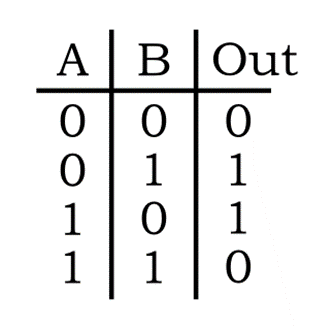


Está función deberá llamarse:
**myperceptron_XOR_DNI()**

¿Cómo es la salida en este caso? ¿A qué se deben los errores cometidos? 


In [ ]:
import pdb
import math as math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def myperceptron_AND_23826389E():
# Función principal que realiza las funciones de:
# 1) Creación de las variables para el banco de entrenamiento y banco de validación
# 2) Creación de la red neuronal (perceptrón)
# 3) Entrenamiento de la red neuronal con el set de valores del banco de entrenamiento
# 4) Validación de la red con el banco de validación
# 5) Cálculo y representación del error cometido
# Creamos las entradas y salidas de entrenamiento para una función AND
# Inicializamos las variables E1, E2 y SE ideales para entrenamiento

	VT = 100000 #número de muestras de entrada
	E1 = np.random.randint(2, size=VT)
	E2 = np.random.randint(2, size=VT)
	SE = E1 ^ E2 # output función AND
	input = np.column_stack((E1, E2))
# Creamos las entradas y salidas de validación E1V, E2V, SEV para test
	vtest = 20 #número de muestras de entrada
	E1V = np.random.randint(2, size=vtest)
	E2V = np.random.randint(2, size=vtest)
	SEV = E1V ^ E2V
	input_test = np.column_stack((E1V, E2V))

	# Inicializamos un perceptrón para 2 entradas
	myperceptron = initialize_perceptron(2)

	# Entrenamos el perceptron para un LR, por defecto 0.7
	LR = 0.7
	myperceptronT=train_perceptron(myperceptron,LR,input,SE)

	# Evaluamos el perceptrón
	S_est=useperceptron(myperceptronT,input_test)
	error = np.mean(abs(SEV-S_est))

	# Visualización del Resultado
	ejex=np.arange(0,20,1)
	plt.scatter(ejex,SEV)
	plt.scatter(ejex,S_est,marker="x")
	plt.show()
	return None

def initialize_perceptron(n_inputs):
# Esta función crea e inicializa la estructura myperceptron.weights
# donde se guardan los pesos del perceptron. Los valores de los pesos
# iniciales deben ser números aleatorios entre -1 y 1.
# n_inputs: numero de entradas al perceptron
# OUTPUTS
# bias: bias del perceptron
# weights: pesos del perceptron
	class perceptron:
		neurons=1
		bias = 1
		weights = np.random.rand(n_inputs+1)-np.random.rand(n_inputs+1)
	myperceptron = perceptron()
	return myperceptron

def sigmoid(x):
# Funcion de activacion sigmoide
	out= 1/(1+math.exp(-x))
	return out

def train_perceptron(myperceptron, LR, input, output):
# Función que modifica los pesos del perceptrón para que vaya aprendiendo a partir
# de los vales de entrada que se le indican
# INPUTS
# myperceptron: estructura con el perceptron
# LR: tasa de aprendizaje
# input: matriz con valores de entrada de entrenamiento ([E1 E2])
# output: vector con valores de salida de entrenamiento ([SE])
# OUTPUTS
# myperceptron: perceptron ya entrenado
# bias: bias del perceptron
# weights: pesos del perceptron
# ESTE PERCEPTRÓN UTILIZA:

# Función de activación sigmoidal
	res=0
	iter=0
	for x in input:
		xp=np.concatenate(([myperceptron.bias],x))
		res = np.cumsum(myperceptron.weights * xp)
		res=res[len(res)-1]
		res=sigmoid(res)
		if res!=output[iter]:
			correct=(LR*xp*(output[iter]-res))
			myperceptron.weights=myperceptron.weights+correct
		print(iter)
		print(res)
		print(output[iter])
		iter=iter+1
	return myperceptron
def useperceptron(myperceptron, input):
# funcion que utiliza el perceptron para calcular las salidas a partir de
# las entradas de acuerdo con lo que haya aprendido el perceptron en la
# fase de entrenamiento
# INPUTS
# myperceptron: perceptron
# input: entrada que se le pasara al perceptron (datos test)
# OUTPUTS
# out: salida
	res=0
	for x in input:
		xp=np.concatenate(([myperceptron.bias],x))
		restemp = np.cumsum(myperceptron.weights * xp)
		restemp=restemp[len(restemp)-1]
		restemp=sigmoid(restemp)
		res=np.append(res, restemp)
	return res[1:len(res)]

myperceptron_AND_23826389E()


# **2. RED NEURONAL MULTICAPA**





Ahora vamos a programar una red con dos capas de neuronas para conseguir que efectivamente sea capaz de aprender cómo funciona una red XOR. Donde cada neurona de la primera capa tendrá solo una entrada. El esquema de las 3 neuronas que vamos a programar será el siguiente:


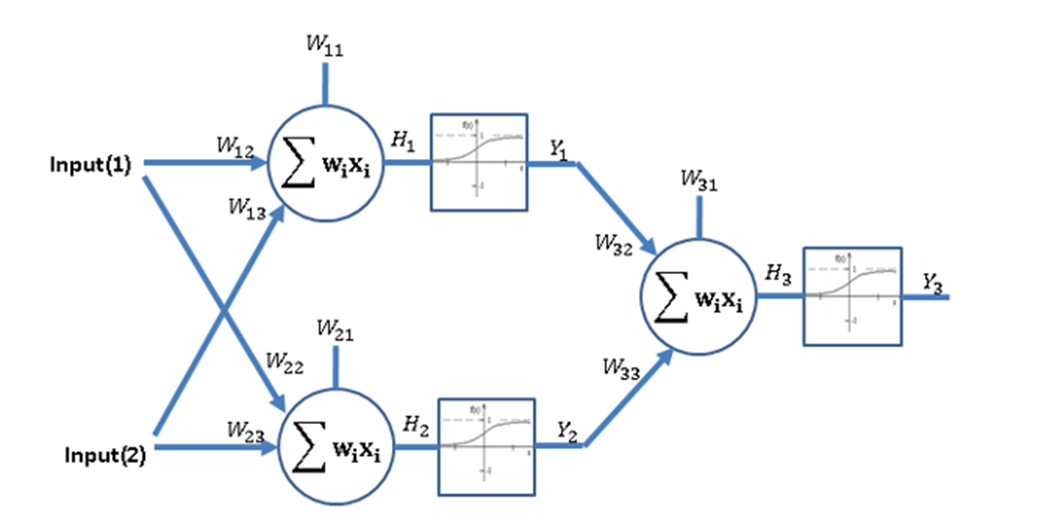
 
En este caso también vamos a utilizar como función de transferencia la función sigmoidal con un parámetro α igual a 1. Ahora el método de entrenamiento que utilizaremos será el BACKPROPAGATION con un coeficiente de aprendizaje η=0.7. Es decir la variación de los pesos en cada iteración del entrenamiento será igual a la siguiente función, donde delta se calculará de forma distinta si se trata de la neurona de salida o de una neurona de la capa oculta.


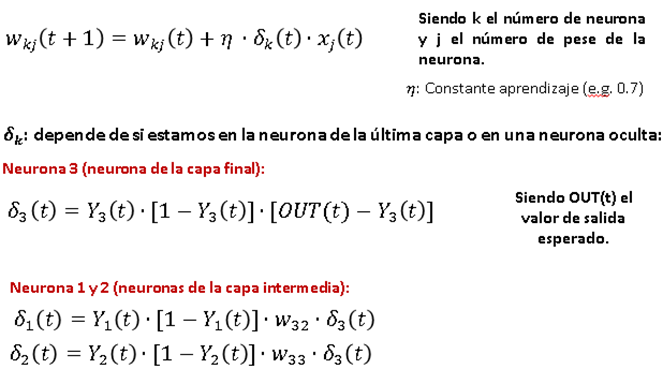


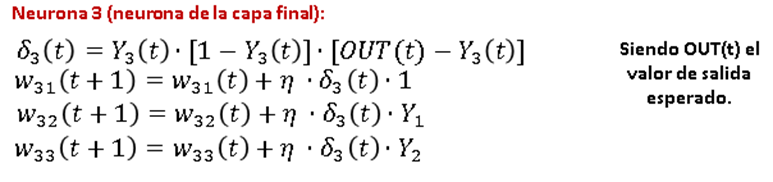

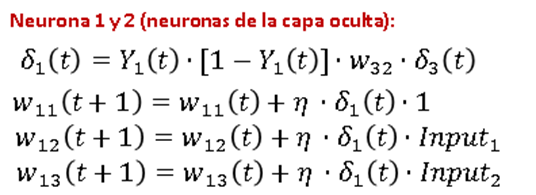

Deberás programar una estructura de funciones similar a la anterior pero ahora utilizando una red neuronal en vez de solo una neurona. El principal cambio radica en que antes solo teníamos en cuenta 3 pesos y ahora deberemos tener en cuenta 9 pesos, 3 por cada neurona. Para ello sustituiremos el vector de pesos por una matriz de pesos.
La función principal que debes crear se llamará:
**mynn_XOR_DNI()**


# **3. RED NEURONAL CON SCIKIT LEARN**
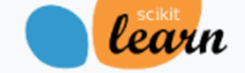

Python cuenta con múltiples recursos y librerías que nos permiten implementar redes neuronales de manera sencilla y óptima. 

Scikit-learn es una de las librerías más utilizadas en machine learning.
Podrás encontrar más información en el siguiente enlace: 
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

En este apartado tendrás que realizar una red neuronal para la función XOR utilizando las funciones propias de esta librería y visualizar los resultados como en los ejercicios anteriores.

La nueva función que implementaréis en este apartado se llamará:
sklearn_NN_XOR()

Las funciones principales a utilizar de esta librería son:

* MLPClassifier
* fit
* predict

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [ ]:
def sklearn_NN_XOR():

	VT = 100000 #número de muestras de entrada
	E1 = np.random.randint(2, size=VT)
	E2 = np.random.randint(2, size=VT)
	SE = E1 ^ E2 # output función AND
	input = np.column_stack((E1, E2))
# Creamos las entradas y salidas de validación E1V, E2V, SEV para test
	vtest = 20 #número de muestras de entrada
	E1V = np.random.randint(2, size=vtest)
	E2V = np.random.randint(2, size=vtest)
	SEV = E1V ^ E2V
	input_test = np.column_stack((E1V, E2V))


  # Definimos el perceptrón MLPClassifier
#	clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
	clf = MLPClassifier(learning_rate_init=0.7,activation='logistic',hidden_layer_sizes=(5, 2), random_state=1)
	clf.fit(input, SE)
	sol=clf.predict(input_test)

	print("=======Solución======")
	print(SEV)
	print("=======Predicción=====")
	print(sol)